In [393]:
import os
import pandas as pd

df = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [395]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [396]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=False)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [397]:
for col in df.columns:
    print(f'{col} = {len(df[col].unique())}')

CreditScore = 460
Geography = 3
Gender = 2
Age = 70
Tenure = 11
Balance = 6382
NumOfProducts = 4
HasCrCard = 2
IsActiveMember = 2
EstimatedSalary = 9999
Exited = 2


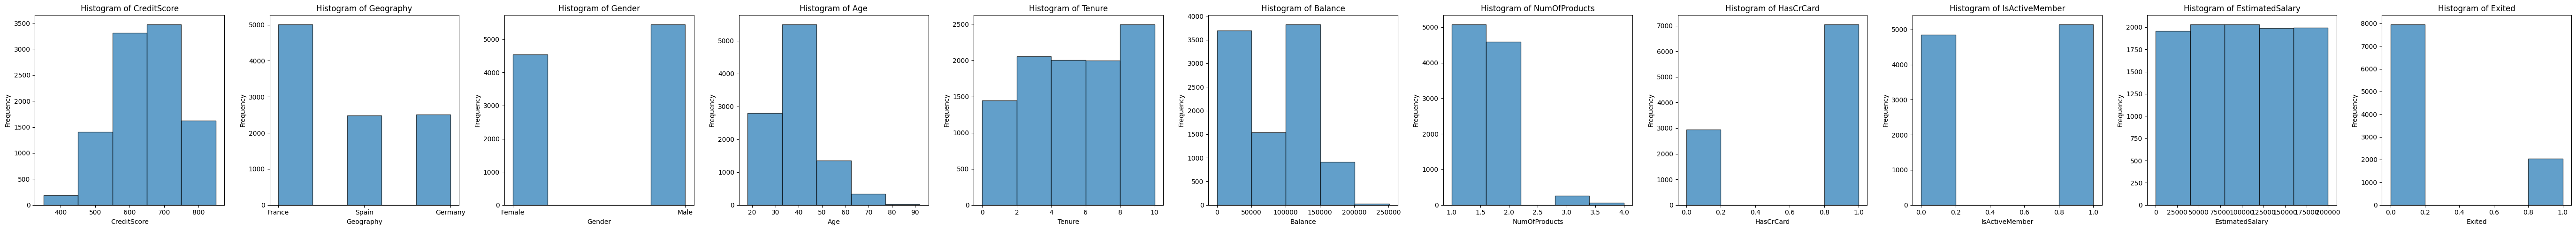

In [398]:
import matplotlib.pyplot as plt

# Number of columns
num_columns = len(df.columns)

# Create subplots: 1 row, n columns
fig, axes = plt.subplots(1, num_columns, figsize=(5*num_columns, 5))

# Loop through each column and plot in its respective subplot
for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=5, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [399]:
from sklearn.preprocessing import LabelEncoder

print(f'Before Encoder\n\n\n{df.info()}')

for non_num_col in df.select_dtypes(exclude=['number']):
    df[non_num_col] = LabelEncoder().fit_transform(df[non_num_col])
    
print(f'After Encoder{df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
Before Encoder


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cre

In [400]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

print(f'X\n{X}')
print(f'y\n{y}')

X
      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary 

In [401]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [402]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (10000, 10)
y shape: (10000,)


In [403]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [404]:
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')

print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (8000, 10)
X test shape: (2000, 10)
y train shape: (8000,)
y test shape: (2000,)


In [405]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

ANN_model = Sequential()

# input layer
ANN_model.add(Dense(128, activation='sigmoid'))

# hidden layers
ANN_model.add(Dense(64, activation='linear'))
ANN_model.add(Dense(32, activation='linear'))
ANN_model.add(Dropout(0.25))

ANN_model.add(Dense(16, activation='linear'))
ANN_model.add(Dense(16, activation='linear'))
ANN_model.add(Dropout(0.25))

ANN_model.add(Dense(8, activation='linear'))
ANN_model.add(Dense(4, activation='linear'))

# output layer
ANN_model.add(Dense(1, activation='sigmoid'))

In [406]:
ANN_model.compile(
    optimizer = Adam(learning_rate=0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [407]:
call_back = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [408]:
ANN_model.fit(
    X_train,
    y_train,
    epochs=500,
    validation_data=(X_test, y_test),
    batch_size=80,
    callbacks=call_back
)

Epoch 1/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7503 - loss: 0.7825 - val_accuracy: 0.8080 - val_loss: 0.4390
Epoch 2/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8081 - loss: 0.4419 - val_accuracy: 0.8050 - val_loss: 0.4347
Epoch 3/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8060 - loss: 0.4476 - val_accuracy: 0.8090 - val_loss: 0.4267
Epoch 4/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8049 - loss: 0.4374 - val_accuracy: 0.8300 - val_loss: 0.4100
Epoch 5/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8140 - loss: 0.4340 - val_accuracy: 0.8430 - val_loss: 0.3920
Epoch 6/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8216 - loss: 0.4197 - val_accuracy: 0.8235 - val_loss: 0.3951
Epoch 7/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8350 - loss: 0.3908 - val_accuracy: 0.8310 - val_loss: 0.3794
Epoch 8/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8421 - loss: 0.3814 - val_accu

In [429]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = np.round(ANN_model.predict(X_test))


conf_mat = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)

print(f'{conf_mat}\n\n')
print(f'Accuracy: {acc_score}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[1542   53]
 [ 219  186]]


Accuracy: 0.864
